In [ ]:
import os
import time
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import numpy as np
import glob
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath = '/content/drive/MyDrive/Colab Notebooks/CNN_Project/datasets'

In [ ]:
class imgDataset():
    def __init__(self, root, transform=None):
          self.root = root
          self.transform = transform
          self.files = glob.glob(f"{root}/*.jpg")
  
    def __len__(self):
          return len(self.files)
    
    def __getitem__(self, index):
          image = Image.open(self.files[index])
          image = self.transform(image)
          return image

['/content/drive/MyDrive/Colab Notebooks/CNN_Project/test/KakaoTalk_20210204_200331073_02.jpg', '/content/drive/MyDrive/Colab Notebooks/CNN_Project/test/1.jpg', '/content/drive/MyDrive/Colab Notebooks/CNN_Project/test/2.jpg', '/content/drive/MyDrive/Colab Notebooks/CNN_Project/test/5.jpg', '/content/drive/MyDrive/Colab Notebooks/CNN_Project/test/3.jpg', '/content/drive/MyDrive/Colab Notebooks/CNN_Project/test/4.jpg', '/content/drive/MyDrive/Colab Notebooks/CNN_Project/test/qfq.jpg']


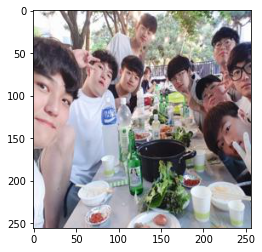

In [ ]:
import matplotlib.pyplot as plt

files = glob.glob(f"{filepath}/test/*.jpg")
print(files)
image = Image.open(files[0])
plt.imshow(image)

In [ ]:
test_dataset = imgDataset(root=f"{filepath}/test",
                          transform=transforms.Compose([
                                                        transforms.ToTensor()
                          ]))
test_loader = DataLoader(test_dataset,
                         batch_size=1,
                         shuffle=False,
                         drop_last=False)

In [ ]:
state_path = f'{filepath}/saved_model/model_state_dict.pt'
model = torchvision.models.resnet101(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2, bias=True)
model = model.cuda()
model.load_state_dict(torch.load(state_path))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

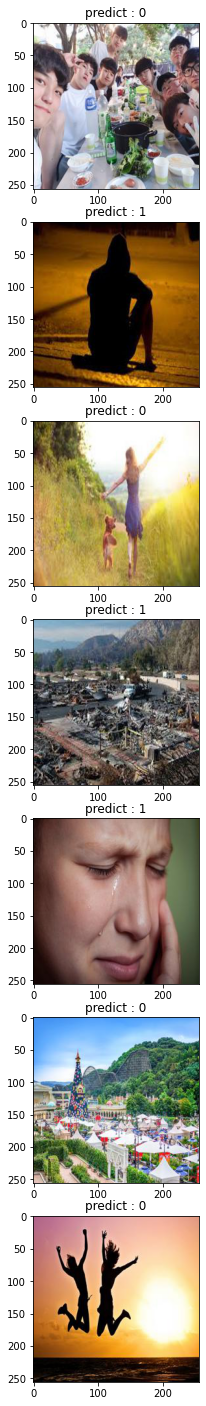

In [ ]:
prediction_index = []
transform = transforms.ToPILImage()

for _, (batch) in enumerate(test_loader):
    batch = batch.cuda()
    prediction = model(batch)
    _, i = prediction.max(dim=1)
    prediction_index += i.tolist()

fig = plt.figure(figsize=(25, 25))
nTest = len(test_dataset)
for i in range(nTest):
    fig.add_subplot(nTest, 1, i+1)
    plt.imshow(transform(test_dataset[i]))
    plt.title(f"predict : {str(prediction_index[i])}")